Assignment4 - Apply appropriate ML algorithm on a dataset collected in a cosmetics shop showing
details of customers to predict customer response for special offer. Create confusion
matrix based on above data and find
a) Accuracy
b) Precision
c) Recall
d) F-1 score

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [16]:
df = pd.read_csv("admission.csv")

In [17]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [18]:
df.dtypes


Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [19]:
print(df.columns)


Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


In [20]:
df.columns = df.columns.str.strip() 


In [21]:
# Define features (X) and target variable (y)
x = df.drop(columns=["Chance of Admit"])  
y = df["Chance of Admit"] 


In [22]:
# Split data into training (80%) and testing (20%) sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [24]:
# Standardize feature values
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [29]:
from sklearn.ensemble import RandomForestRegressor


In [30]:
# Train a regression model (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [32]:
# Predict on test set
y_pred = model.predict(x_test)

In [35]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [36]:
# Print results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Squared Error (MSE): 0.0032976442999999994
Root Mean Squared Error (RMSE): 0.057425119068226574
R² Score: 0.838746


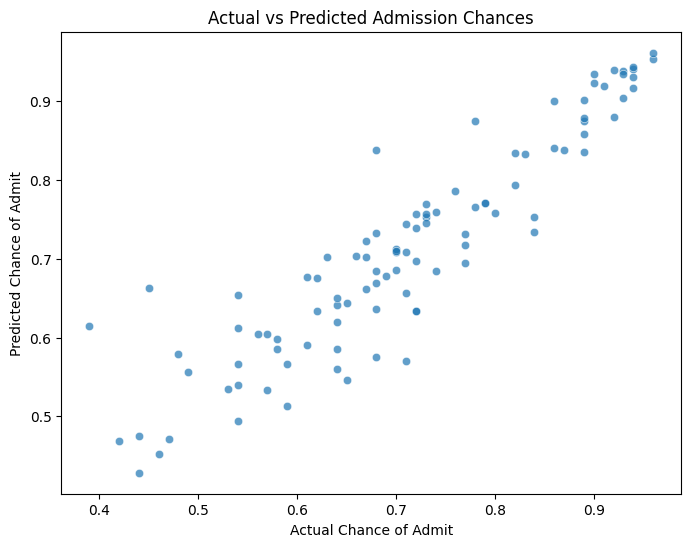

In [37]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Chance of Admit")
plt.ylabel("Predicted Chance of Admit")
plt.title("Actual vs Predicted Admission Chances")
plt.show()

Accuracy: 0.95
Precision: 0.96
Recall: 0.989010989010989
F1-Score: 0.972972972972973
Confusion Matrix:
[[ 5  4]
 [ 1 90]]


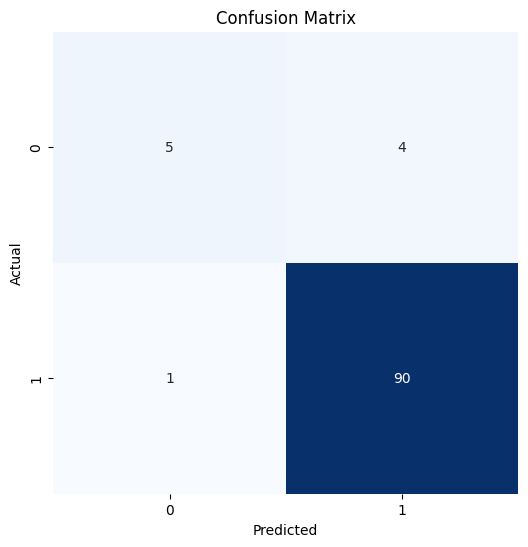

In [45]:
# Discretize the target variable into classes
y_train_class = np.where(y_train >= 0.5, 1, 0)
y_test_class = np.where(y_test >= 0.5, 1, 0)
y_pred_class = np.where(y_pred >= 0.5, 1, 0)

# Calculate accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test_class, y_pred_class)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(y_test_class, y_pred_class)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test_class, y_pred_class)
print("F1-Score:", f1)

# Confusion matrix
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()